In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
dados_imoveis = pd.read_csv(r'C:\Users\Rafael Tomé\OneDrive\Área de Trabalho\Analises\Portifólio de projetos\Projeto Imobiliaria\imoveis_limpo.csv')
dados_imoveis = dados_imoveis[dados_imoveis['Tamanho'] > 100]
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9662 entries, 1 to 16663
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bairros  9662 non-null   object 
 1   Valores  9662 non-null   float64
 2   Quartos  9662 non-null   float64
 3   Suítes   9662 non-null   float64
 4   Vagas    9662 non-null   float64
 5   Tamanho  9662 non-null   float64
 6   Tipo     9662 non-null   object 
dtypes: float64(5), object(2)
memory usage: 603.9+ KB


In [4]:
dados_casas = dados_imoveis[dados_imoveis['Tipo'] == 'Apartamento']
dados_casas = dados_casas[['Bairros', 'Suítes', 'Quartos', 'Vagas', 'Tamanho', 'Valores']]
dados_casas

,Bairros,Suítes,Quartos,Vagas,Tamanho,Valores
2,Victor Konder,1.0,2.0,1.0,124.0,375000.0
21,Jardim Blumenau,4.0,4.0,4.0,259.0,2280000.0
24,Jardim Blumenau,1.0,3.0,2.0,107.0,950000.0
26,Jardim Blumenau,3.0,3.0,3.0,175.0,1850000.0
27,Centro,1.0,3.0,2.0,204.0,895000.0
...,...,...,...,...,...,...
16603,Centro,2.0,3.0,0.0,135.0,600000.0
16613,Jardim Blumenau,3.0,3.0,3.0,156.0,1590000.0
16619,Escola Agrícola,3.0,3.0,2.0,106.0,750000.0
16621,Vila Nova,3.0,3.0,2.0,164.0,1350000.0


In [5]:
velha = dados_casas[dados_casas['Bairros'] == 'Velha']
velha = velha.drop(columns='Bairros')
velha.corr()

,Suítes,Quartos,Vagas,Tamanho,Valores
Suítes,1.000000,0.311937,0.154003,0.254222,0.380512
Quartos,0.311937,1.000000,-0.042169,0.451321,0.167294
Vagas,0.154003,-0.042169,1.000000,0.430047,0.484903
Tamanho,0.254222,0.451321,0.430047,1.000000,0.700466
Valores,0.380512,0.167294,0.484903,0.700466,1.000000


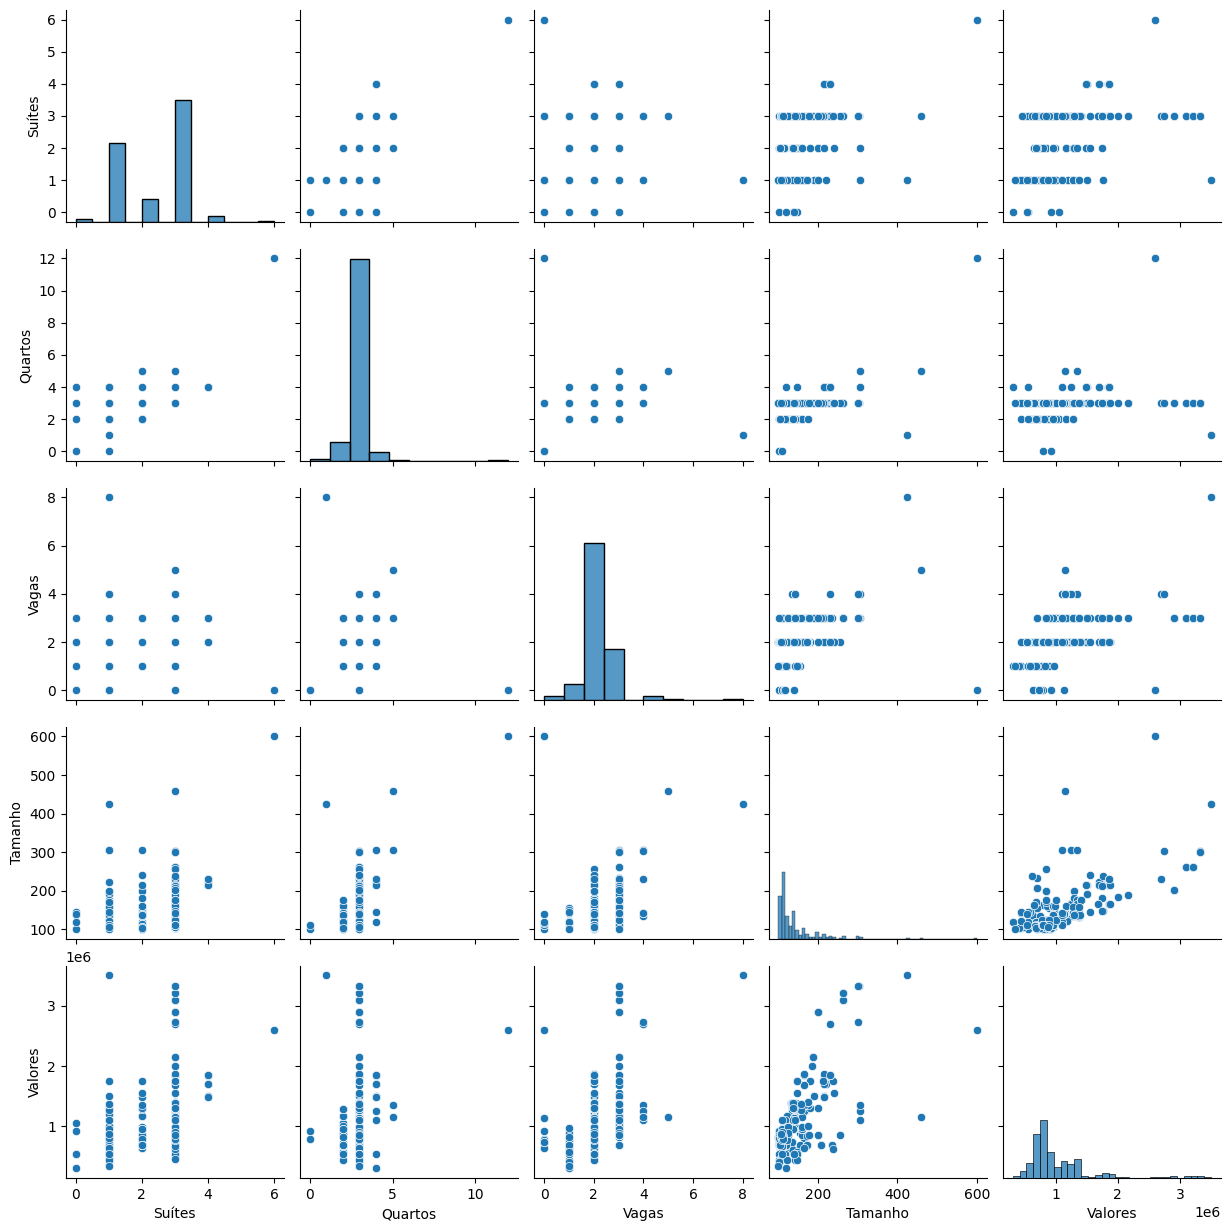

In [6]:
sns.pairplot(velha)

Text(0, 0.5, 'Preço de venda')

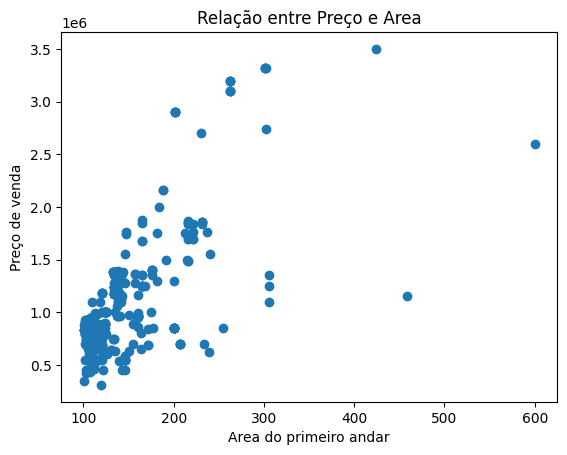

In [7]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(velha['Tamanho'], velha['Valores'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

In [8]:
dados_casas

,Bairros,Suítes,Quartos,Vagas,Tamanho,Valores
2,Victor Konder,1.0,2.0,1.0,124.0,375000.0
21,Jardim Blumenau,4.0,4.0,4.0,259.0,2280000.0
24,Jardim Blumenau,1.0,3.0,2.0,107.0,950000.0
26,Jardim Blumenau,3.0,3.0,3.0,175.0,1850000.0
27,Centro,1.0,3.0,2.0,204.0,895000.0
...,...,...,...,...,...,...
16603,Centro,2.0,3.0,0.0,135.0,600000.0
16613,Jardim Blumenau,3.0,3.0,3.0,156.0,1590000.0
16619,Escola Agrícola,3.0,3.0,2.0,106.0,750000.0
16621,Vila Nova,3.0,3.0,2.0,164.0,1350000.0


In [9]:
dados_casas = dados_imoveis[dados_imoveis['Tipo'] == 'Apartamento']
dados_casas = dados_imoveis[dados_imoveis['Bairros'] == 'Jardim Blumenau']
dados_casas = dados_casas[['Suítes', 'Quartos', 'Vagas', 'Tamanho', 'Valores']]
dados_casas

,Suítes,Quartos,Vagas,Tamanho,Valores
21,4.0,4.0,4.0,259.0,2280000.0
24,1.0,3.0,2.0,107.0,950000.0
26,3.0,3.0,3.0,175.0,1850000.0
31,3.0,3.0,3.0,118.0,1100000.0
110,3.0,3.0,2.0,172.0,880000.0
...,...,...,...,...,...
16424,3.0,3.0,3.0,199.0,1850000.0
16471,3.0,3.0,3.0,134.0,1290000.0
16529,2.0,3.0,10.0,400.0,1470000.0
16574,0.0,2.0,0.0,112.0,320000.0


Text(0, 0.5, 'Preço de venda')

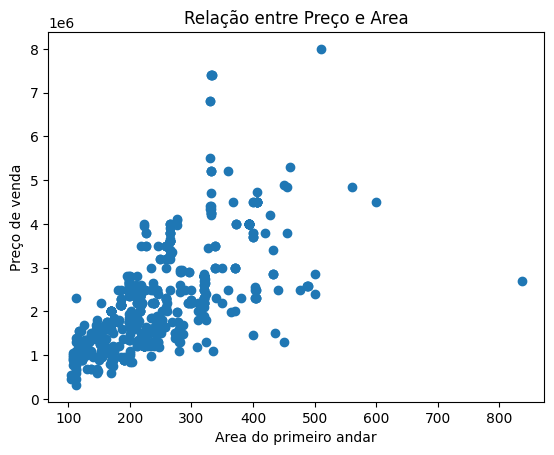

In [10]:
# Como é a relação entre área construida e o preço do imóvel?
plt.scatter(dados_casas['Tamanho'], dados_casas['Valores'])
plt.title("Relação entre Preço e Area")
plt.xlabel("Area do primeiro andar")
plt.ylabel("Preço de venda")

In [11]:
# Qual a reta que melhor se adequa a relação?
px.scatter(dados_casas, x = 'Tamanho', y = 'Valores', trendline_color_override="red", trendline = 'ols' )

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Definindo y e X
y = dados_casas['Valores']
X = dados_casas.drop(columns = 'Valores')

In [14]:
#Aplicando o split do y e X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [15]:
#Dados de treino para usar a fórmula

df_train = pd.DataFrame(data= X_train )
df_train['Valores'] = y_train

In [16]:
# import ols
from statsmodels.formula.api import ols

In [17]:
# ajustando o primeiro modelo
modelo_0 = ols('Valores ~ Tamanho', data = df_train ).fit()

In [18]:
# visualizando os parametros

modelo_0.params

Intercept    130428.117502
Tamanho        8656.969662
dtype: float64

In [19]:
# o resumo do nosso modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     507.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           8.22e-79
Time:                        13:11:42   Log-Likelihood:                -7777.3
No. Observations:                 518   AIC:                         1.556e+04
Df Residuals:                     516   BIC:                         1.557e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.304e+05   9.63e+04      1.355      0.1

In [20]:
# observando o R²
modelo_0.rsquared

np.float64(0.49604142002705054)

In [21]:
# Quem são os residuos
modelo_0.resid

4245    -3.431639e+05
2369    -1.485287e+05
8534    -4.927287e+05
9935    -8.617980e+05
15793   -8.609324e+05
             ...     
15564   -1.154380e+06
10689    2.084858e+05
1881    -1.832936e+05
8610    -3.427287e+05
521      4.093755e+05
Length: 518, dtype: float64

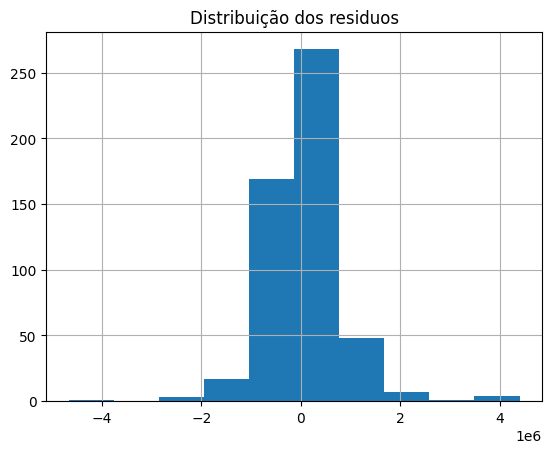

In [22]:
# Como eles estão distribuidos
modelo_0.resid.hist()
plt.title("Distribuição dos residuos")
plt.show()

In [23]:
# definindo o Y previsto
y_predict = modelo_0.predict(X_test)

In [24]:
# importando o r2_score
from sklearn.metrics import r2_score

In [25]:
# printando o r²
print("R²: ", r2_score(y_test,y_predict ))

R²:  0.41565732157334234


In [26]:
# importando a api do statsmodels
import statsmodels.api as sm

In [27]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [28]:
X_train.head()

,const,Suítes,Quartos,Vagas,Tamanho
4245,1.0,2.0,4.0,3.0,371.0
2369,1.0,3.0,3.0,2.0,161.5
8534,1.0,2.0,3.0,2.0,244.0
9935,1.0,3.0,3.0,3.0,223.1
15793,1.0,3.0,3.0,3.0,223.0


In [29]:
X_train.columns

Index(['const', 'Suítes', 'Quartos', 'Vagas', 'Tamanho'], dtype='object')

In [30]:
# Criando o modelo de regressão (sem fómula): saturado
modelo_1 = sm.OLS(y_train,
                  X_train[['const','Suítes',
                          'Quartos','Vagas','Tamanho',
                           ]]).fit()

In [31]:
# Criando o modelo de regressão: Suíte
modelo_2 = sm.OLS(y_train,
                  X_train[['const',
                          'Quartos','Vagas','Tamanho',
                           ]]).fit()

In [32]:
# Criando o modelo de regressão: Quartos
modelo_3 = sm.OLS(y_train,
                  X_train[['const','Suítes',
                          'Vagas','Tamanho',
                           ]]).fit()

In [33]:
# Criando o modelo de regressão: Vagas
modelo_4 = sm.OLS(y_train,
                  X_train[['const','Suítes',
                          'Quartos','Tamanho',
                           ]]).fit()

In [34]:
# Resumo do modelo 1
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           4.64e-90
Time:                        13:11:42   Log-Likelihood:                -7742.0
No. Observations:                 518   AIC:                         1.549e+04
Df Residuals:                     513   BIC:                         1.552e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.381e+05   1.71e+05     -3.140      0.0

In [35]:
# Resumo do modelo 1
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           7.08e-84
Time:                        13:11:42   Log-Likelihood:                -7759.2
No. Observations:                 518   AIC:                         1.553e+04
Df Residuals:                     514   BIC:                         1.554e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.681e+05   1.77e+05     -2.652      0.0

In [36]:
# Resumo do modelo 1
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           5.30e-91
Time:                        13:11:42   Log-Likelihood:                -7742.6
No. Observations:                 518   AIC:                         1.549e+04
Df Residuals:                     514   BIC:                         1.551e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.619e+05   1.29e+05     -5.116      0.0

In [37]:
# Resumo do modelo 1
print(modelo_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Valores   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     205.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.49e-87
Time:                        13:11:42   Log-Likelihood:                -7750.7
No. Observations:                 518   AIC:                         1.551e+04
Df Residuals:                     514   BIC:                         1.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.846e+05   1.63e+05     -1.749      0.0

In [38]:
print("R²")
print("Modelo 1: ", modelo_1.rsquared)
print("Modelo 2: ", modelo_2.rsquared)
print("Modelo 3: ", modelo_3.rsquared)
print("Modelo 4: ", modelo_4.rsquared)

R²
Modelo 1:  0.5601559422207243
Modelo 2:  0.5300011322615328
Modelo 3:  0.5591152784571238
Modelo 4:  0.5452521033647315


In [39]:
#Quantos parametros estão no modelo?
print(len(modelo_1.params))
print(len(modelo_2.params))
print(len(modelo_3.params))
print(len(modelo_4.params))

5
4
4
4


In [40]:
modelo_1.params

const     -538089.377018
Suítes     257716.833839
Quartos    -70243.347340
Vagas      167431.326023
Tamanho      7176.830818
dtype: float64

In [41]:
# Adicionando uma constante em X_test
X_test = sm.add_constant(X_test)

In [42]:
# Prevendo com o modelo 3
predict_1 = modelo_1.predict(X_test[['const','Suítes','Quartos', 'Vagas',
                         'Tamanho']])

In [43]:
# Qual o r² da previsão?
modelo_1.rsquared

np.float64(0.5601559422207243)

In [44]:
# Qual o R² do treino?
print("R²: ", r2_score(y_test, predict_1))

R²:  0.5691486378807529


In [45]:
modelo_2.params

const     -468106.258382
Quartos    103298.544794
Vagas      235537.863914
Tamanho      6786.696610
dtype: float64

In [46]:
#Novo imovel
novo_imovel = pd.DataFrame({ 'const': [1],
                              'Quartos': [2],
                              'Vagas': [3],
                              'Tamanho':[217.5]
})

In [53]:
# Qual o preço desse imóvel com o modelo 0?
print(modelo_0.predict(novo_imovel)[0])
print(modelo_2.predict(novo_imovel)[0])


2013319.0189213618
1921210.9355988165


In [48]:
# Qual o preço desse imóvel com o modelo 3?
print(modelo_2.predict(novo_imovel)[0])

1921210.9355988165
